We have 125 days 01:56:45 worth of data.


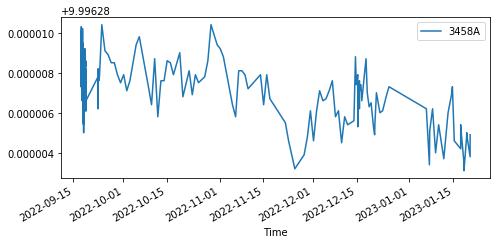

In [44]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

columns = ["Time", "3458A"]
raw=pd.read_csv("https://raw.githubusercontent.com/marcoreps/multiinstrumentalist/master/csv/ADRmu1-3458A.csv", usecols=columns)
raw[columns[0]] = pd.to_datetime(raw[columns[0]])
print("We have "+str(raw[columns[0]].max() - raw[columns[0]].min())+" worth of data.")
raw = raw.set_index(pd.DatetimeIndex(raw[columns[0]]))
raw = raw.drop('Time', axis=1)
#raw.head()
raw.plot()
#plt.show()
